Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

loading dataset

In [ ]:
car_data = pd.read_csv('/content/cars_price.csv')
car_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
car_data.shape


(205, 26)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Finding missing values


In [ ]:
print(car_data.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


Finding missing values (?) in the dataset and replacing it with NaN

In [ ]:
car_data.replace("?", np.nan, inplace = True)
car_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Counting missing  values 

In [ ]:
missing_data = car_data.isnull()
missing_data.head(5)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Missing values are

    "normalized-losses": 41 missing data, replace them with mean
    "stroke": 4 missing data, replace them with mean
    "bore": 4 missing data, replace them with mean
    "horsepower": 2 missing data, replace them with mean
    "peak-rpm": 2 missing data, replace them with mean


In [ ]:
avg_norm_loss = car_data["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [ ]:
car_data["normalized-losses"].replace(np.nan,avg_norm_loss,inplace=True)

In [ ]:
avg_bore = car_data["bore"].astype("float").mean(axis=0)
print("Average of Bore Values:",avg_bore)

Average of Bore Values: 3.3297512437810943


In [ ]:
car_data['bore'].replace(np.nan,avg_bore,inplace=True)

In [ ]:
avg_stroke = car_data["stroke"].astype("float").mean(axis=0)
print("Average of Stroke Values:",avg_stroke)

Average of Stroke Values: 3.255422885572139


In [ ]:
car_data['stroke'].replace(np.nan,avg_stroke,inplace=True)

In [ ]:
avg_horsepower = car_data["horsepower"].astype("float").mean(axis=0)
print("Average of Horse power Values:",avg_horsepower)

Average of Horse power Values: 104.25615763546799


In [ ]:
car_data['horsepower'].replace(np.nan,avg_horsepower,inplace=True)

In [ ]:
avg_peakrpm = car_data["peak-rpm"].astype("float").mean(axis=0)
print("Average of peak-rpm",avg_peakrpm)

Average of peak-rpm 5125.369458128079


In [ ]:
car_data['peak-rpm'].replace(np.nan,avg_peakrpm,inplace=True)

num-of-doors": 2 missing data, replace them with "four".

    Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur


In [ ]:
car_data['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [ ]:
car_data['num-of-doors'].replace(np.nan,"four",inplace=True)

"price": 4 missing data, simply delete the whole row

    Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us


In [ ]:
# simply drop whole row with NaN in "price" column
car_data.dropna(subset=["price"],axis=0,inplace=True)

# reset index, because we droped two rows
car_data.reset_index(drop=True,inplace=True)

In [ ]:
car_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
car_data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Convert data types to proper format

In [ ]:
car_data[["bore", "stroke"]] = car_data[["bore", "stroke"]].astype("float")
#car_data[["normalized-losses"]] = car_data[["normalized-losses"]].astype("int")
car_data[["price"]] = car_data[["price"]].astype("float")
car_data[["peak-rpm"]] = car_data[["peak-rpm"]].astype("float")

In [ ]:
car_data.drop('normalized-losses',axis=1)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0
197,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045.0
198,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485.0
199,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470.0


In [ ]:
car_data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

finding car names

In [ ]:
car_data.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

<Figure size 1500x1000 with 0 Axes>

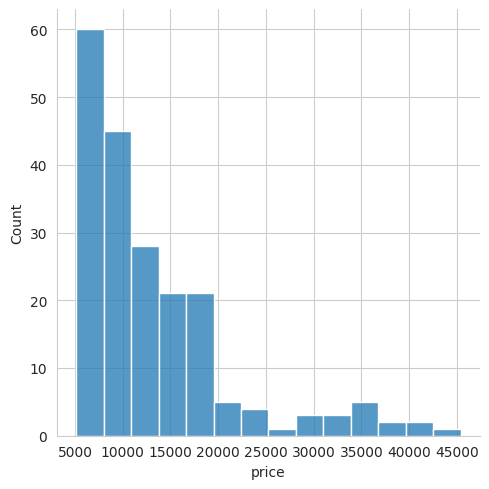

In [ ]:
#Finding the dirtribution of values
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.displot(car_data.price)
plt.show()

finding correlation

In [ ]:
print(car_data.corr())

                   symboling  wheel-base    length     width    height  \
symboling           1.000000   -0.535987 -0.365404 -0.242423 -0.550160   
wheel-base         -0.535987    1.000000  0.876024  0.814507  0.590742   
length             -0.365404    0.876024  1.000000  0.857170  0.492063   
width              -0.242423    0.814507  0.857170  1.000000  0.306002   
height             -0.550160    0.590742  0.492063  0.306002  1.000000   
curb-weight        -0.233118    0.782097  0.880665  0.866201  0.307581   
engine-size        -0.110581    0.572027  0.685025  0.729436  0.074694   
bore               -0.140019    0.493244  0.608971  0.544885  0.180449   
stroke             -0.008153    0.158018  0.123952  0.188822 -0.060663   
compression-ratio  -0.182196    0.250313  0.159733  0.189867  0.259737   
peak-rpm            0.279740   -0.360305 -0.285970 -0.245800 -0.309974   
city-mpg           -0.035527   -0.470606 -0.665192 -0.633531 -0.049800   
highway-mpg         0.036233   -0.5433

<ipython-input-113-cb74dcd95fdb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(car_data.corr())


<ipython-input-114-e1035b684407>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = car_data.corr()


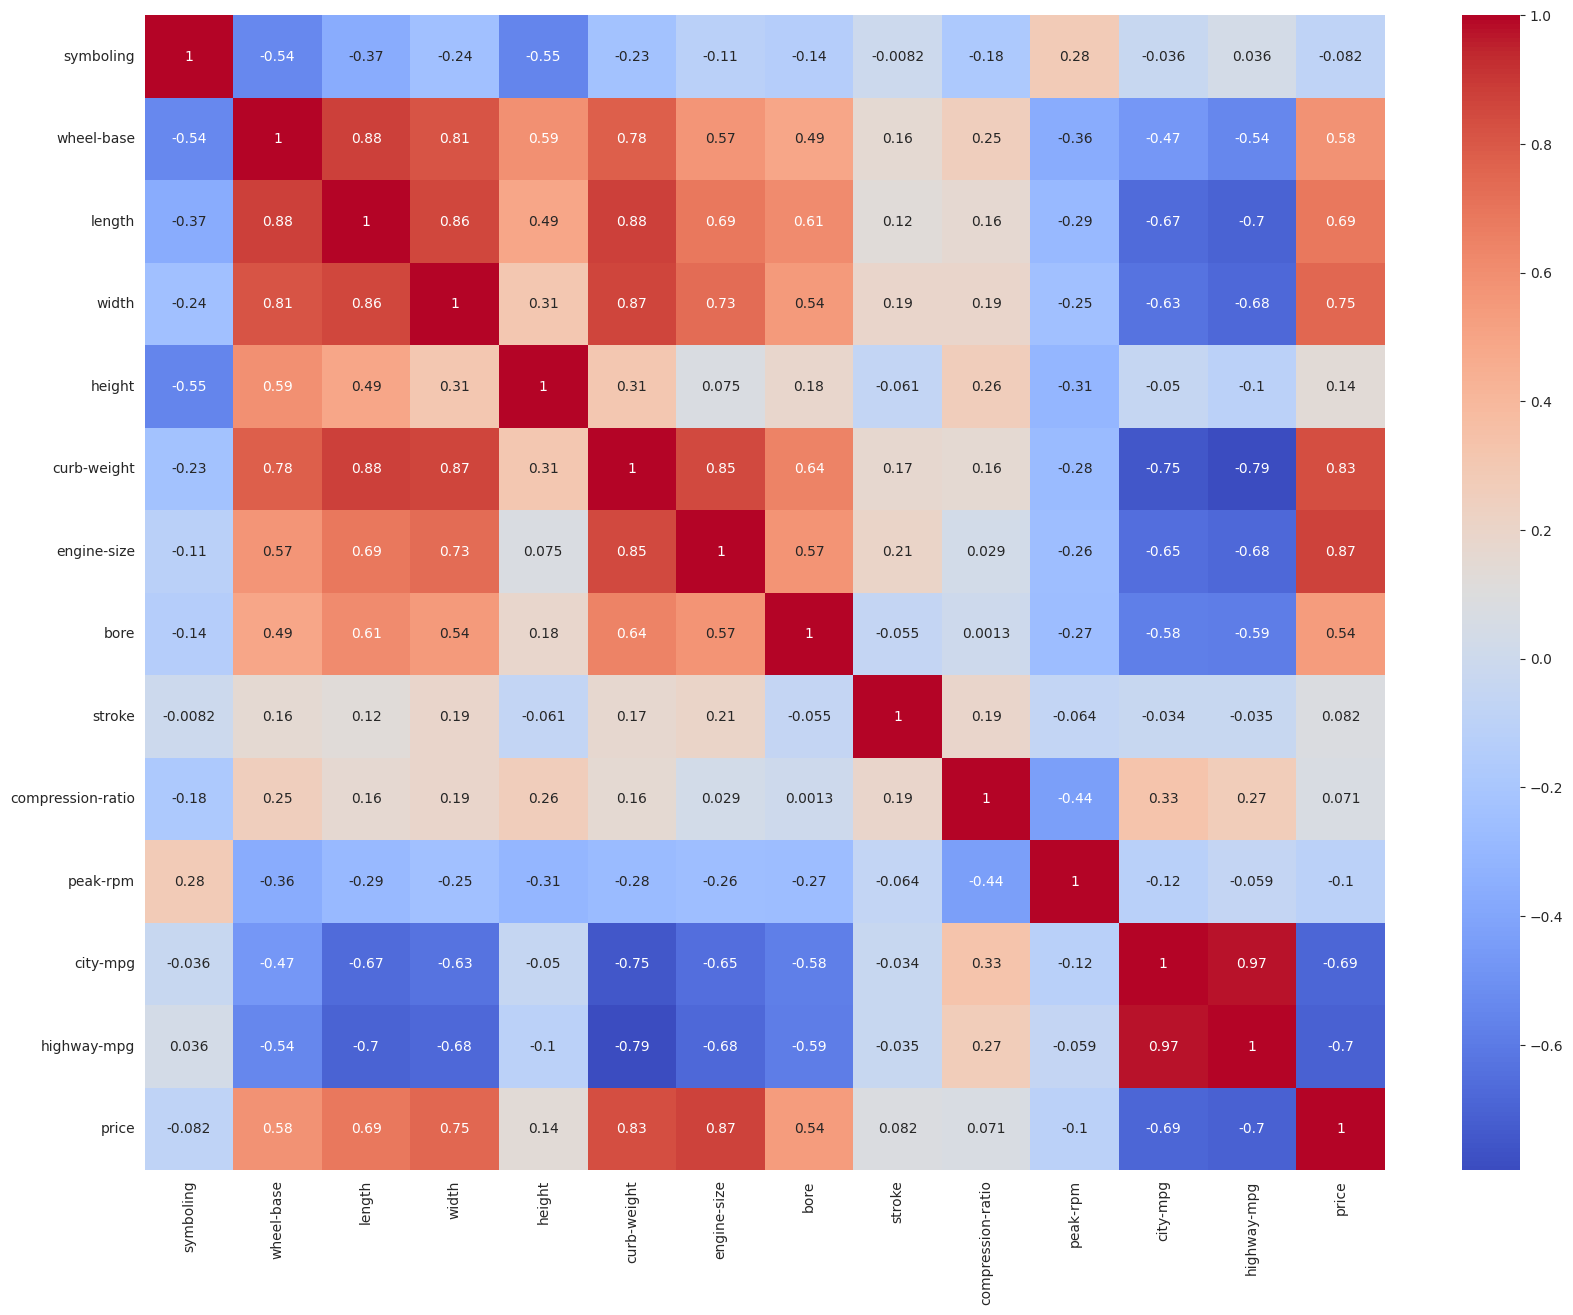

In [ ]:
plt.figure(figsize=(20, 15))
correlations = car_data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

Linear Regression model

In [ ]:
X=car_data.drop(columns='price')
y=car_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [ ]:
car_data.dtypes


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
ohe = OneHotEncoder()
ohe.fit(X[['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']])

OneHotEncoder()

In [ ]:
ohe.categories_

[array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
        'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
        'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object),
 array(['diesel', 'gas'], dtype=object),
 array(['std', 'turbo'], dtype=object),
 array(['four', 'two'], dtype=object),
 array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
       dtype=object),
 array(['4wd', 'fwd', 'rwd'], dtype=object),
 array(['front', 'rear'], dtype=object),
 array(['dohc', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
 array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
       dtype=object),
 array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
       dtype=object)]

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']),remainder='passthrough')

In [ ]:
lr=LinearRegression()

In [ ]:
pipe=make_pipeline(column_trans,lr)

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', '...
                                                                            array(['dohc', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
                                                                            array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
      dtype=object),
                                                                            array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype=object)]),
                                                  ['make', 'fuel-type',
                                                   'aspiration', 'num-of-doors',
                                                   'body-style', 'drive-wheels',
                                                   'engine-location',
                                                   'engine-type',
                                                   'num-of-cylinders',
                                                   'fuel-system'])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
y_pred

array([-2.06374164e+12,  1.49709336e+04,  9.18447266e+03,  1.42578359e+04,
        6.37810547e+03,  1.54202266e+04,  8.99679297e+03,  8.70039062e+03,
        1.64685550e+13,  6.31521484e+03,  8.35877344e+03,  5.73759766e+03,
        1.64685550e+13,  1.28365195e+04,  6.56216797e+03,  8.56278125e+03,
        1.33118672e+04,  1.38296328e+04,  1.92645742e+04,  3.07486562e+04,
        9.77713281e+03,  6.76482422e+03,  3.25853960e+11,  9.66551953e+03,
        8.59651172e+03,  6.56557422e+03,  6.03410156e+03,  5.59211328e+03,
        1.12486719e+04,  1.01304961e+04,  1.88669688e+04,  5.50293359e+03,
        9.51524609e+03,  7.88698438e+03,  4.99600391e+03,  1.21629102e+04,
        3.83020664e+04,  1.07628242e+04,  1.22753945e+04,  8.35327734e+03,
        1.79635000e+04])

In [ ]:
r2_score(y_test,y_pred)

-1.9460368439900493e+17

In [ ]:
from sklearn.metrics import (
    mean_absolute_error, # MAE
    mean_squared_error # MSE
)

In [ ]:
predicted = pipe.predict(X_test)
MAE = mean_absolute_error(
    y_true=y_test, # actual values
    y_pred=predicted # predicted values
)
MAE.round(2)

861626964473.83

In [ ]:
MSE = mean_squared_error(
    y_true=y_test, # actual values
    y_pred=predicted # predicted values
)
MSE.round(2)

1.3336385700776087e+25

model 2 using logistic regression

In [ ]:
X=car_data.drop(columns='price')
y=car_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)




In [ ]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [ ]:
ohe = OneHotEncoder()
ohe.fit(X[['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']])

OneHotEncoder()

In [ ]:
ohe.categories_

[array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
        'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
        'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object),
 array(['diesel', 'gas'], dtype=object),
 array(['std', 'turbo'], dtype=object),
 array(['four', 'two'], dtype=object),
 array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
       dtype=object),
 array(['4wd', 'fwd', 'rwd'], dtype=object),
 array(['front', 'rear'], dtype=object),
 array(['dohc', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
 array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
       dtype=object),
 array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
       dtype=object)]

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']),remainder='passthrough')

In [ ]:
car_data.dtypes


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  


In [ ]:
pipe=make_pipeline(column_trans,classifier)

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', '...
                                                                            array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
      dtype=object),
                                                                            array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype=object)]),
                                                  ['make', 'fuel-type',
                                                   'aspiration', 'num-of-doors',
                                                   'body-style', 'drive-wheels',
                                                   'engine-location',
                                                   'engine-type',
                                                   'num-of-cylinders',
                                                   'fuel-system'])])),
                ('logisticregression', LogisticRegression(random_state=0))])

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
y_pred

array([ 8921.,  8845., 16558.,  6229.,  7609., 13860., 18399., 12940.,
       17950., 17450.,  7995., 20970.,  7129., 34184.,  8238.,  8845.,
        9895., 17450.,  9980., 12440., 16500., 34028.,  7957., 34184.,
        5399., 11199.,  6229.,  9980., 10898., 11845.,  8845., 28176.,
       13499., 13499., 13499.,  8845.,  8845., 11595., 16500.,  8921.,
        7609.])

In [ ]:
r2_score(y_test,y_pred)

0.7830106390273469

In [ ]:
from sklearn.metrics import (
    mean_absolute_error, # MAE
    mean_squared_error # MSE
)

In [ ]:
predicted = pipe.predict(X_test)
MAE = mean_absolute_error(
    y_true=y_test, # actual values
    y_pred=predicted # predicted values
)
MAE.round(2)

2680.44

In [ ]:
MSE = mean_squared_error(
    y_true=y_test, # actual values
    y_pred=predicted # predicted values
)
MSE.round(2)

17349262.49

FINAL MODEL USING LOGISTIC REGRESSION

In [ ]:

from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
X=car_data.drop(columns='price')
y=car_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
ohe = OneHotEncoder()
ohe.fit(X[['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']])
olumn_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']),remainder='passthrough')
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
pipe=make_pipeline(column_trans,classifier)
y_pred=pipe.predict(X_test)
y_pred